# Modified from https://github.com/ritvikmath/Time-Series-Analysis/blob/master/Anomaly%20Detection.ipynb

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
from datetime import timedelta
from pandas.plotting import register_matplotlib_converters
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.tsa.statespace.sarimax import SARIMAX
register_matplotlib_converters()
from time import time
from pmdarima import auto_arima


# Catfish Sales Data

In [ ]:
def parser(s):
    return datetime.strptime(s, '%Y-%m-%d')

In [113]:
#read data
catfish_sales = pd.read_csv('data/catfish.csv', parse_dates=[0], index_col=0, date_parser=parser)

C:\Users\salmank\AppData\Local\Temp\ipykernel_4152\3461106580.py:2: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  catfish_sales = pd.read_csv('data/catfish.csv', parse_dates=[0], index_col=0, date_parser=parser)


In [114]:
#infer the frequency of the data
catfish_sales = catfish_sales.asfreq(pd.infer_freq(catfish_sales.index))

In [115]:
start_date = datetime(1996,1,1)
end_date = datetime(2000,1,1)
lim_catfish_sales = catfish_sales[start_date:end_date]

# Introduce an Anomaly

In [116]:
#lim_catfish_sales.loc(axis=0)[datetime(1998,12,1)]  = 10000

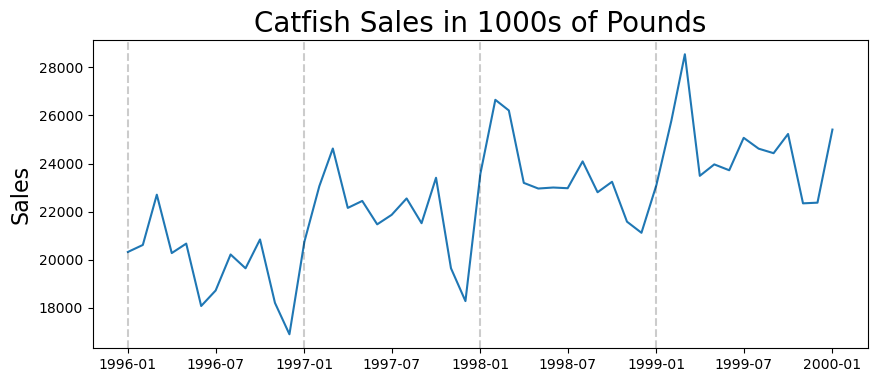

In [117]:
plt.figure(figsize=(10,4))
plt.plot(lim_catfish_sales)
plt.title('Catfish Sales in 1000s of Pounds', fontsize=20)
plt.ylabel('Sales', fontsize=16)
for year in range(start_date.year,end_date.year):
    plt.axvline(pd.to_datetime(str(year)+'-01-01'), color='k', linestyle='--', alpha=0.2)

## Remove the trend

In [118]:
first_diff = lim_catfish_sales.diff()[1:]

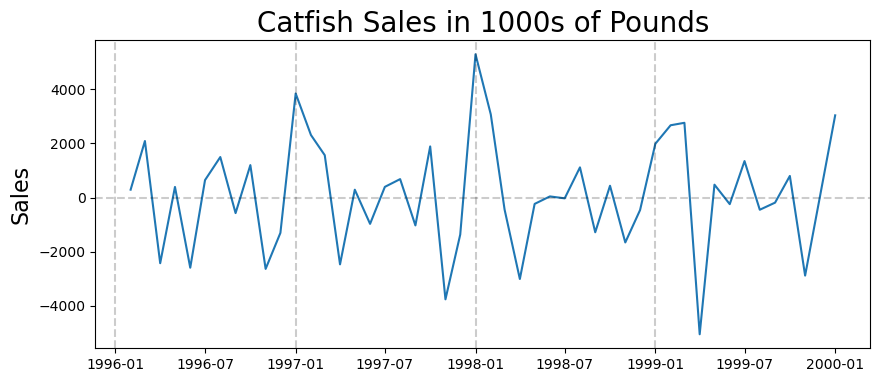

In [119]:
plt.figure(figsize=(10,4))
plt.plot(first_diff)
plt.title('Catfish Sales in 1000s of Pounds', fontsize=20)
plt.ylabel('Sales', fontsize=16)
for year in range(start_date.year,end_date.year):
    plt.axvline(pd.to_datetime(str(year)+'-01-01'), color='k', linestyle='--', alpha=0.2)
plt.axhline(0, color='k', linestyle='--', alpha=0.2)

# Get training and testing sets

In [134]:
train_end = datetime(1999,7,1)
test_end = datetime(2000,1,1)

test_data = lim_catfish_sales[train_end:test_end]
test_data

,Total
Date,
1999-07-01,25069
1999-08-01,24618
1999-09-01,24430
1999-10-01,25229
1999-11-01,22344
1999-12-01,22372
2000-01-01,25412


# Make Predictions

In [135]:
# Select order of model
Sarimax_model = auto_arima(train_data,
                       start_P=1,
                       start_q=1,
                       max_p=5,
                       max_q=5,
                       m=12,
                       seasonal=True,
                       d=None,
                       D=1,
                       trace=True,
                       error_action='ignore',
                       suppress_warnings=True,
                       stepwise=True)
Sarimax_model.summary()

Performing stepwise search to minimize aic
 ARIMA(2,0,1)(1,1,1)[12] intercept   : AIC=626.096, Time=0.36 sec
 ARIMA(0,0,0)(0,1,0)[12] intercept   : AIC=621.371, Time=0.03 sec
 ARIMA(1,0,0)(1,1,0)[12] intercept   : AIC=622.272, Time=0.11 sec
 ARIMA(0,0,1)(0,1,1)[12] intercept   : AIC=622.864, Time=0.12 sec
 ARIMA(0,0,0)(0,1,0)[12]             : AIC=664.240, Time=0.04 sec
 ARIMA(0,0,0)(1,1,0)[12] intercept   : AIC=622.288, Time=0.09 sec
 ARIMA(0,0,0)(0,1,1)[12] intercept   : AIC=621.855, Time=0.07 sec
 ARIMA(0,0,0)(1,1,1)[12] intercept   : AIC=623.491, Time=0.28 sec
 ARIMA(1,0,0)(0,1,0)[12] intercept   : AIC=623.340, Time=0.18 sec
 ARIMA(0,0,1)(0,1,0)[12] intercept   : AIC=623.416, Time=0.04 sec
 ARIMA(1,0,1)(0,1,0)[12] intercept   : AIC=625.343, Time=0.07 sec

Best model:  ARIMA(0,0,0)(0,1,0)[12] intercept
Total fit time: 1.394 seconds


<class 'statsmodels.iolib.summary.Summary'>
"""
                                SARIMAX Results                                 
================================================================================
Dep. Variable:                        y   No. Observations:                   49
Model:             SARIMAX(0, 1, 0, 12)   Log Likelihood                -308.685
Date:                  Mon, 01 Jul 2024   AIC                            621.371
Time:                          15:16:09   BIC                            624.593
Sample:                      01-01-1996   HQIC                           622.507
                           - 01-01-2000                                         
Covariance Type:                    opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept   1561.8919    169.695      9.204      0.000    1229.296    1894.488
sigma2      1.033e+06   2.56e+05      4.042      0.000    5.32e+05    1.53e+06
===================================================================================
Ljung-Box (L1) (Q):                   1.36   Jarque-Bera (JB):                 0.39
Prob(Q):                              0.24   Prob(JB):                         0.82
Heteroskedasticity (H):               1.20   Skew:                            -0.24
Prob(H) (two-sided):                  0.76   Kurtosis:                         2.82
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [127]:
my_order = (0,1,1)
my_seasonal_order = (1, 1, [], 12)

In [133]:
test_data

,Total
Date,
1999-08-01,24618
1999-09-01,24430
1999-10-01,25229
1999-11-01,22344
1999-12-01,22372
2000-01-01,25412


In [132]:
rolling_predictions = test_data.copy()
for train_end in test_data.index:
    train_data = lim_catfish_sales[:train_end]
    model = SARIMAX(train_data, order=my_order, seasonal_order=my_seasonal_order)
    model_fit = model.fit()

    pred = model_fit.forecast()
    print(pred)
    rolling_predictions.loc(axis=0)[train_end] = pred.values[0]

1999-09-01    23831.814767
Freq: MS, dtype: float64
1999-10-01    24942.652915
Freq: MS, dtype: float64


C:\Users\salmank\AppData\Local\Temp\ipykernel_4152\3445642181.py:9: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '23831.814766543077' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  rolling_predictions.loc(axis=0)[train_end] = pred.values[0]


1999-11-01    22763.734599
Freq: MS, dtype: float64
1999-12-01    21842.227459
Freq: MS, dtype: float64
2000-01-01    25046.875586
Freq: MS, dtype: float64
2000-02-01    28004.550267
Freq: MS, dtype: float64


In [73]:
rolling_residuals = test_data - rolling_predictions

Text(0, 0.5, 'Error')

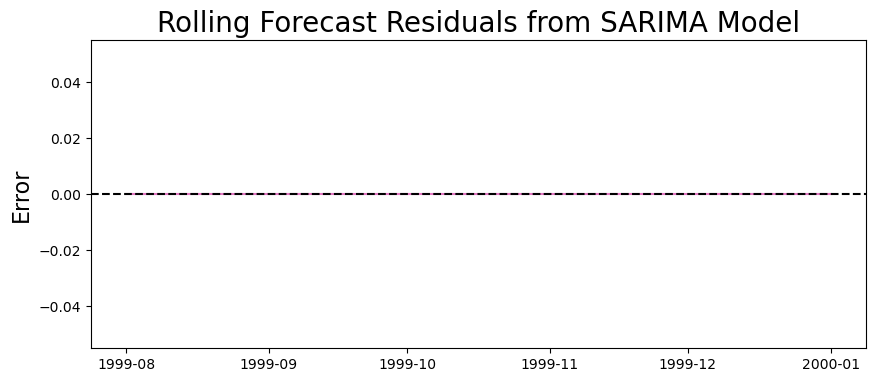

In [74]:
plt.figure(figsize=(10,4))
plt.plot(rolling_residuals)
plt.axhline(0, linestyle='--', color='k')
plt.title('Rolling Forecast Residuals from SARIMA Model', fontsize=20)
plt.ylabel('Error', fontsize=16)

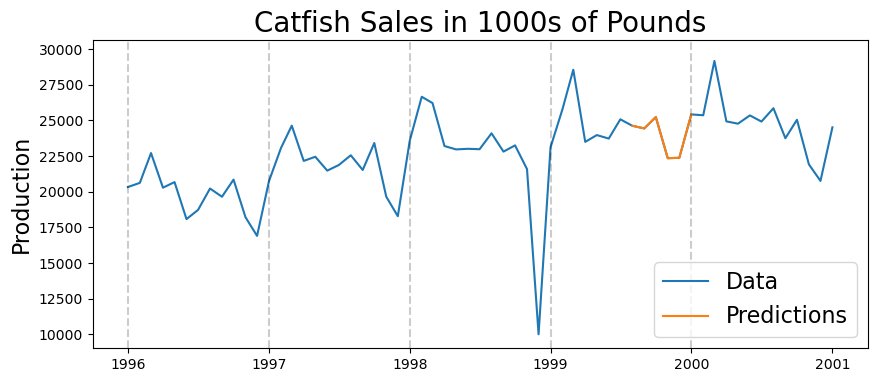

In [75]:
plt.figure(figsize=(10,4))

plt.plot(lim_catfish_sales)
plt.plot(rolling_predictions)

plt.legend(('Data', 'Predictions'), fontsize=16)

plt.title('Catfish Sales in 1000s of Pounds', fontsize=20)
plt.ylabel('Production', fontsize=16)
for year in range(start_date.year,end_date.year):
    plt.axvline(pd.to_datetime(str(year)+'-01-01'), color='k', linestyle='--', alpha=0.2)

In [58]:
print('Mean Absolute Percent Error:', round(np.mean(abs(rolling_residuals/test_data)),4))

Mean Absolute Percent Error: 0.0


In [59]:
print('Root Mean Squared Error:', np.sqrt(np.mean(rolling_residuals**2)))

Root Mean Squared Error: 0.0


# Detecting the Anomaly

## Attempt 1: Deviation Method

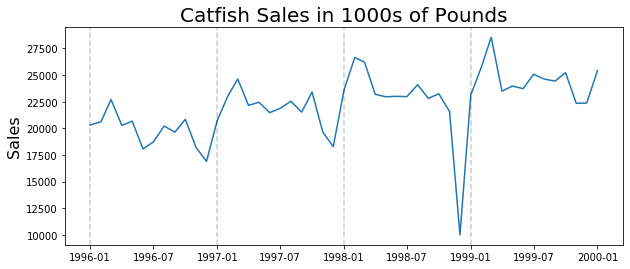

In [30]:
plt.figure(figsize=(10,4))
plt.plot(lim_catfish_sales)
plt.title('Catfish Sales in 1000s of Pounds', fontsize=20)
plt.ylabel('Sales', fontsize=16)
for year in range(start_date.year,end_date.year):
    plt.axvline(pd.to_datetime(str(year)+'-01-01'), color='k', linestyle='--', alpha=0.2)

In [31]:
rolling_deviations = pd.Series(dtype=float, index = lim_catfish_sales.index)

In [32]:
for date in rolling_deviations.index:
    #get the window ending at this data point
    window = lim_catfish_sales.loc[:date]
    
    #get the deviation within this window
    rolling_deviations.loc[date] = window.std()

In [33]:
#get the difference in deviation between one time point and the next
diff_rolling_deviations = rolling_deviations.diff()
diff_rolling_deviations = diff_rolling_deviations.dropna()

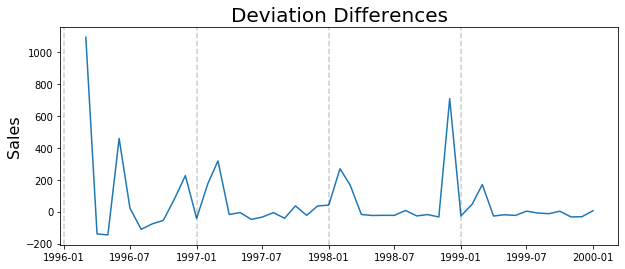

In [34]:
plt.figure(figsize=(10,4))
plt.plot(diff_rolling_deviations)
plt.title('Deviation Differences', fontsize=20)
plt.ylabel('Sales', fontsize=16)
for year in range(start_date.year,end_date.year):
    plt.axvline(pd.to_datetime(str(year)+'-01-01'), color='k', linestyle='--', alpha=0.2)

## Attempt 2: Seasonal Method

In [35]:
month_deviations = lim_catfish_sales.groupby(lambda d: d.month).std()

Text(0, 0.5, 'Sales')

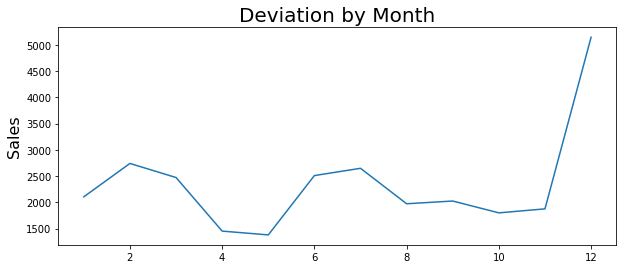

In [36]:
plt.figure(figsize=(10,4))
plt.plot(month_deviations)
plt.title('Deviation by Month', fontsize=20)
plt.ylabel('Sales', fontsize=16)

## So, the anomaly occurs in a December

In [37]:
december_data = lim_catfish_sales[lim_catfish_sales.index.month == 12]

In [38]:
december_data

Date
1996-12-01    16898
1997-12-01    18278
1998-12-01    10000
1999-12-01    22372
Name: Total, dtype: int64

In [39]:
min_dev = 9999999
curr_anomaly = None
for date in december_data.index:
    other_data = december_data[december_data.index != date]
    curr_dev = other_data.std()
    if curr_dev < min_dev:
        min_dev = curr_dev
        curr_anomaly = date

In [40]:
curr_anomaly

Timestamp('1998-12-01 00:00:00')

# What to do about the anomaly?

## Simple Idea: use mean of other months

In [50]:
adjusted_data = lim_catfish_sales.copy()
adjusted_data.loc[curr_anomaly] = december_data[(december_data.index != curr_anomaly) & (december_data.index < test_data.index[0])].mean()

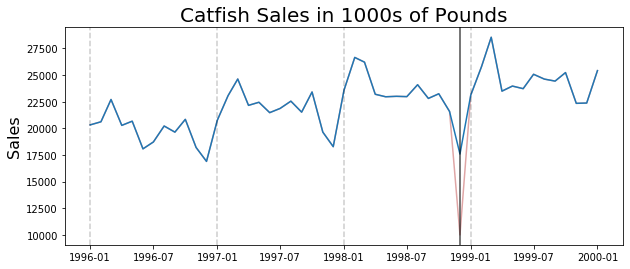

In [51]:
plt.figure(figsize=(10,4))
plt.plot(lim_catfish_sales, color='firebrick', alpha=0.4)
plt.plot(adjusted_data)
plt.title('Catfish Sales in 1000s of Pounds', fontsize=20)
plt.ylabel('Sales', fontsize=16)
for year in range(start_date.year,end_date.year):
    plt.axvline(pd.to_datetime(str(year)+'-01-01'), color='k', linestyle='--', alpha=0.2)
plt.axvline(curr_anomaly, color='k', alpha=0.7)

# Resulting Predictions

In [52]:
train_end = datetime(1999,7,1)
test_end = datetime(2000,1,1)

test_data = adjusted_data[train_end + timedelta(days=1):test_end]

In [53]:
rolling_predictions = test_data.copy()
for train_end in test_data.index:
    train_data = adjusted_data[:train_end-timedelta(days=1)]
    model = SARIMAX(train_data, order=my_order, seasonal_order=my_seasonal_order)
    model_fit = model.fit()

    pred = model_fit.forecast()
    rolling_predictions[train_end] = pred

C:\Users\ritvik\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\ritvik\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\ritvik\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\ritvik\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


In [54]:
rolling_residuals = test_data - rolling_predictions

Text(0, 0.5, 'Error')

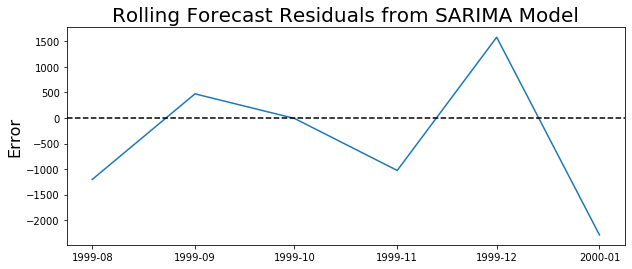

In [55]:
plt.figure(figsize=(10,4))
plt.plot(rolling_residuals)
plt.axhline(0, linestyle='--', color='k')
plt.title('Rolling Forecast Residuals from SARIMA Model', fontsize=20)
plt.ylabel('Error', fontsize=16)

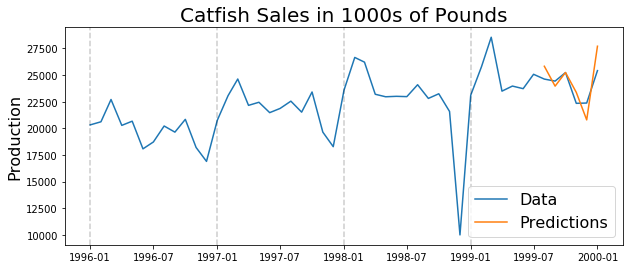

In [56]:
plt.figure(figsize=(10,4))

plt.plot(lim_catfish_sales)
plt.plot(rolling_predictions)

plt.legend(('Data', 'Predictions'), fontsize=16)

plt.title('Catfish Sales in 1000s of Pounds', fontsize=20)
plt.ylabel('Production', fontsize=16)
for year in range(start_date.year,end_date.year):
    plt.axvline(pd.to_datetime(str(year)+'-01-01'), color='k', linestyle='--', alpha=0.2)

In [57]:
print('Mean Absolute Percent Error:', round(np.mean(abs(rolling_residuals/test_data)),4))

Mean Absolute Percent Error: 0.0459


In [58]:
print('Root Mean Squared Error:', np.sqrt(np.mean(rolling_residuals**2)))

Root Mean Squared Error: 1321.1246722569683
